In [1]:
using MatrixProductBP, MatrixProductBP.Models
using Plots
import ProgressMeter; ProgressMeter.ijulia_behavior(:clear)
using JLD2
using LaTeXStrings;

In [23]:
T = 40         # final time
k = 3          # degree
m⁰ = -1       # magnetization at time zero

β = 1.0
J = 0.8
h = 0.3;

In [24]:
wᵢ = fill(HomogeneousGlauberFactor(J, h, β), T+1)
ϕᵢ = [ t == 0 ? [(1+m⁰)/2, (1-m⁰)/2] : ones(2) for t in 0:T]
bp = mpbp_infinite_graph(k, wᵢ, 2, ϕᵢ)
cb = CB_BP(bp);

In [25]:
matrix_sizes = [5, 10]
maxiters = fill(50, length(matrix_sizes))
iters = zeros(Int, length(maxiters))
tol = 1e-5
for i in eachindex(maxiters)
    iters[i], _ = iterate!(bp; maxiter=maxiters[i], svd_trunc=TruncBond(matrix_sizes[i]), cb, tol)
end

Running MPBP: iter 2    Time: 0:00:00

Running MPBP: iter 3    Time: 0:00:00

Running MPBP: iter 4    Time: 0:00:01

Running MPBP: iter 5    Time: 0:00:01

Running MPBP: iter 6    Time: 0:00:01

Running MPBP: iter 7    Time: 0:00:01

Running MPBP: iter 8    Time: 0:00:01

Running MPBP: iter 9    Time: 0:00:01

Running MPBP: iter 10    Time: 0:00:02

Running MPBP: iter 11    Time: 0:00:02

Running MPBP: iter 12    Time: 0:00:02

Running MPBP: iter 13    Time: 0:00:02

Running MPBP: iter 14    Time: 0:00:02

Running MPBP: iter 15    Time: 0:00:03

Running MPBP: iter 16    Time: 0:00:03

Running MPBP: iter 17    Time: 0:00:03

Running MPBP: iter 18    Time: 0:00:03

Running MPBP: iter 19    Time: 0:00:03

Running MPBP: iter 20    Time: 0:00:03

Running MPBP: iter 21    Time: 0:00:03

Running MPBP: iter 22    Time: 0:00:04

Running MPBP: iter 23    Time: 0:00:04

Running MPBP: iter 24    Time: 0:00:04

Running MPBP: iter 25    Time: 0:00:04

Running MPBP: iter 26    Time: 0:00:04

Running 

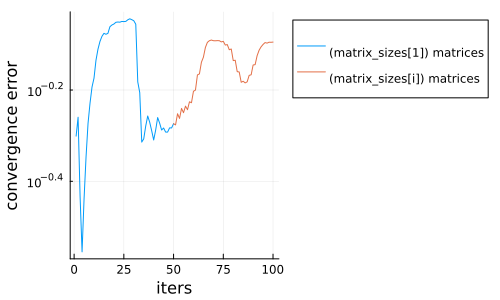

In [26]:
iters_cum = cumsum(iters)
inds = 1:iters_cum[1]
pl = plot(inds, cb.Δs[inds], label="
(matrix_sizes[1]) matrices")
for i in 2:length(iters)
    inds = iters_cum[i-1]:iters_cum[i]
   plot!(pl, inds, cb.Δs[inds], label="
(matrix_sizes[i]) matrices")
end
plot(pl, ylabel="convergence error", xlabel="iters", yaxis=:log10, size=(500,300),
    legend=:outertopright)

In [27]:
spin(x, i) = 3-2x
m = only(means(spin, bp));

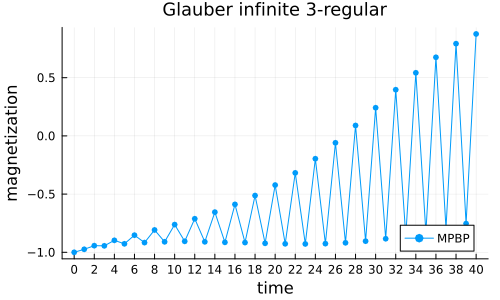

In [28]:
blue = theme_palette(:auto)[1]
pl = plot(0:T, m, m=:o, xlabel="time", ylabel="magnetization", label="MPBP",
    size=(500,300), xticks=0:2:T, ms=3, title="Glauber infinite $k-regular", titlefontsize=12,
    legend=:bottomright, msc=:auto, c=blue)

## Monte Carlo

In [41]:
T = 40         # final time
k = 3          # degree
m⁰ = -1       # magnetization at time zero

β = 1.0
J = 0.8
h = 0.2;

In [42]:
using Graphs, IndexedGraphs, Statistics

N = 10^3
g = random_regular_graph(N, k)
ising = Ising(IndexedGraph(g); J=fill(J, ne(g)), h=fill(h, N), β)
bp_mc = mpbp(Glauber(ising, T); ϕ = fill(ϕᵢ, N))
sms = SoftMarginSampler(bp_mc);

In [43]:
sample!(sms, 10^3)
spin(x) = 3-2x
m_mc = mean(vec(spin.(mean(X, dims=1))) for X in sms.X);

SoftMargin sampling  98%|███████████████████████████████▎|  ETA: 0:00:002mSoftMargin sampling   0%|▏                               |  ETA: 0:02:25SoftMargin sampling   0%|▏                               |  ETA: 0:02:25SoftMargin sampling   0%|▏                               |  ETA: 0:02:25SoftMargin sampling   0%|▏                               |  ETA: 0:02:25SoftMargin sampling   0%|▏                               |  ETA: 0:02:25

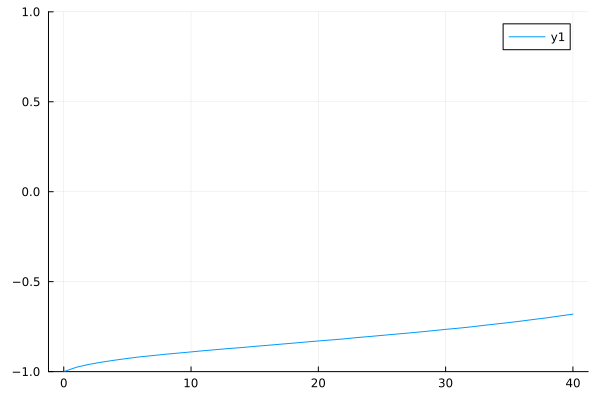

In [44]:
pl = plot(0:T, m_mc, ylims=(-1,1))